In [1]:
%matplotlib notebook

from cmath import exp
from math import pow, pi

import cirq
import matplotlib.pyplot as plt
import numpy as np
from cirq import protocols
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

style.use('seaborn-pastel')

# complex 0 + 1i
Imag = complex(0, 1)

A = 2 * pi * Imag / 3
B = 4 * pi * Imag / 3


In [3]:
Unitaries = [
    [
        [np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=complex)],
        [np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]], dtype=complex)],
        [np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0], [0, exp(A), 0], [0, 0, exp(B)]], dtype=complex)],
        [np.array([[0, 0, exp(B)], [1, 0, 0], [0, exp(A), 0]], dtype=complex)],
        [np.array([[0, exp(A), 0], [0, 0, exp(B)], [1, 0, 0]], dtype=complex)]
    ],
    [
        [np.array([[1, 0, 0], [0, exp(B), 0], [0, 0, exp(A)]], dtype=complex)],
        [np.array([[0, 0, exp(A)], [1, 0, 0], [0, exp(B), 0]], dtype=complex)],
        [np.array([[0, exp(B), 0], [0, 0, exp(B)], [1, 0, 0]], dtype=complex)]
    ]
]

In [4]:
class QutritIdle(cirq.SingleQubitGate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        return Unitaries[0][0][0]

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'I'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


class CustomUGate(cirq.SingleQubitGate):
    def __init__(self, unitary_matrix):
        self.unitary_matrix = unitary_matrix

    def _qid_shape_(self):
        return 3,

    def _unitary_(self):
        return self.unitary_matrix

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'U'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


class QutritHadamard(cirq.SingleQubitGate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 1, 1],
            [1, exp(A), exp(B)],
            [1, exp(B), exp(A)]
        ], dtype=complex)
        arr *= 1 / pow(3, 0.5)
        return arr

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'H'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


class QutritHadamardHermitik(cirq.SingleQubitGate):
    def _qid_shape_(self):
        return 3,

    @staticmethod
    def _unitary_():
        return QutritHadamard().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return 'Ht'

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


class QutritCNOT(cirq.TwoQubitGate):
    def _qid_shape_(self):
        return 3, 3,

    @staticmethod
    def _unitary_():
        arr = np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0, 0, 1, 0, 0]
        ], dtype=complex)
        return arr

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@', 'X'))

    def __str__(self):
        return str(self._unitary_())


class QutritCNOTHermitik(cirq.TwoQubitGate):
    def _qid_shape_(self):
        return 3, 3,

    @staticmethod
    def _unitary_():
        return QutritCNOT().transform_matrix.conjugate().T

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('@\'', 'X'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


class SpecialGate(cirq.ThreeQubitGate):
    def __init__(self, matrix=None):
        if matrix is not None:
            self.unitary_matrix = matrix

    def _qid_shape_(self):
        return 3, 3, 3

    def _unitary_(self):
        self.unitary_matrix = np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-A), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-B), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-A), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-B), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-A), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-B), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-B), 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-A), 0, 0, 0, 0, 0, 0],

            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-B), 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-B), 0, 0, 0, 0, 0],

            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-B), 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, exp(-A), 0]
        ], dtype=complex)
        return self.unitary_matrix

    @staticmethod
    def _circuit_diagram_info_(args):
        return protocols.CircuitDiagramInfo(
            wire_symbols=('S', 'S', 'S'))

    @property
    def transform_matrix(self) -> np.ndarray:
        return self._unitary_()

    def __str__(self):
        return str(self._unitary_())


In [5]:
def drawer_all(sonuclar_zero, sonuclar_one, sonuclar_two, sonuclar_all, sonuclar_rand1, sonuclar_rand2, shots):
    %matplotlib notebook
    cat_zero = np.array([1, 0, 0], dtype=complex)
    title_rand1 = str(np.round(cat_zero.dot(np.array([
        [exp(2 * pi * Imag / 3), -0.2, complex(-0.4, 0.5)],
        [0, 0, 0.5],
        [-Imag / 1.35, 0, -1]])), 1))

    title_rand2 = str(np.round(cat_zero.dot(np.array([
        [0.5, -Imag, exp(4 * pi * Imag / 3)],
        [-Imag / 1.5, 0, -0.75],
        [0.5, -1, complex(1, 0.5)]])), 1))

    # Prepair the data for plotting
    # sonuclar_all = sonuclar_all[0].dot(sonuclar_all[1]).flatten()
    sonuclar_zero = sonuclar_zero[0].dot(sonuclar_zero[1]).flatten()
    sonuclar_one = sonuclar_one[0].dot(sonuclar_one[1]).flatten()
    sonuclar_two = sonuclar_two[0].dot(sonuclar_two[1]).flatten()
    sonuclar_rand1 = sonuclar_rand1[0].dot(sonuclar_rand1[1]).flatten()
    # sonuclar_rand2 = sonuclar_rand2[0].dot(sonuclar_rand2[1]).flatten()

    sonuclar_all = [sonuclar_all[1][0][0], 0, 0, 0, sonuclar_all[1][0][1], 0, 0, 0, sonuclar_all[1][0][2]]
    sonuclar_rand2 = [sonuclar_rand2[1][0][0], 0, 0, 0, sonuclar_rand2[1][0][1], 0, 0, 0, sonuclar_rand2[1][0][2]]
    print(sonuclar_all)
    fig, ((ax0, axrand2, axall)) = plt.subplots(1, 3, subplot_kw=dict(projection='3d'))
    fig.set_size_inches(16, 9)

    fig.suptitle("3-boyutta ışınlama sonuçları")
    fig.subplots_adjust(0.06, 0.06, 0.94, 0.86, 0.21, 0.21)

    _x = np.arange(3)
    _y = np.arange(3)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    bottom = 0
    width = 0.65
    depth = 0.65

    bar_x = bar_y = ['|0>', '|1>', '|2>']

    """
    ax1.minorticks_off()
    ax1.set_yticks([0, 1, 2])
    ax1.set_xticks([0, 1, 2])
    ax1.set_xticklabels(bar_x)
    ax1.set_yticklabels(bar_y)
    ax1.set_xlabel('|Mesaj>')
    ax1.set_ylabel('|Bob>')
    ax1.set_zlabel('İhtimal')
    ax1.set_zlim3d(0, 1)
    ax1.set_title('Mesaj 1 olduğu durumlarda\nshots = {}'.format(shots), fontsize=11)
    ax1.get_proj = lambda: np.dot(Axes3D.get_proj(ax1), np.diag([1, 1, 0.8, 1]))
    """

    ax0.minorticks_off()
    ax0.set_yticks([0, 1, 2])
    ax0.set_xticks([0, 1, 2])
    ax0.set_xticklabels(bar_x)
    ax0.set_yticklabels(bar_y)
    ax0.set_xlabel('|Mesaj>')
    ax0.set_ylabel('|Bob>')
    ax0.set_zlabel('İhtimal')
    ax0.set_zlim3d(0, 1)
    ax0.set_title('Mesaj [ 1+0j  0+0j  0+0j ] olduğu durumda\nshots = {}'.format(shots), fontsize=11)
    ax0.get_proj = lambda: np.dot(Axes3D.get_proj(ax0), np.diag([1, 1, 0.8, 1]))

    """
    ax2.minorticks_off()
    ax2.set_yticks([0, 1, 2])
    ax2.set_xticks([0, 1, 2])
    ax2.set_xticklabels(bar_x)
    ax2.set_yticklabels(bar_y)
    ax2.set_xlabel('|Mesaj>')
    ax2.set_ylabel('|Bob>')
    ax2.set_zlabel('İhtimal')
    ax2.set_zlim3d(0, 1)
    ax2.set_title('Mesaj 2 olduğu durumlarda\nshots = {}'.format(shots), fontsize=11)
    ax2.get_proj = lambda: np.dot(Axes3D.get_proj(ax2), np.diag([1, 1, 0.8, 1]))
    
    """
    axall.minorticks_off()
    axall.set_yticks([0, 1, 2])
    axall.set_xticks([0, 1, 2])
    axall.set_xticklabels(bar_x)
    axall.set_yticklabels(bar_y)
    axall.set_xlabel('|Mesaj>')
    axall.set_ylabel('|Bob>')
    axall.set_zlabel('İhtimal')
    axall.set_zlim3d(0, 1)
    axall.set_title('Süperpozisyon durumunda\nshots = {}'.format(shots), fontsize=11)
    axall.get_proj = lambda: np.dot(Axes3D.get_proj(axall), np.diag([1, 1, 0.8, 1]))

    """
    axrand1.minorticks_off()
    axrand1.set_yticks([0, 1, 2])
    axrand1.set_xticks([0, 1, 2])
    axrand1.set_xticklabels(bar_x)
    axrand1.set_yticklabels(bar_y)
    axrand1.set_xlabel('|Mesaj⟩')
    axrand1.set_ylabel('|Bob⟩')
    axrand1.set_zlabel('İhtimal')
    axrand1.set_zlim3d(0, 1)
    axrand1.set_title('Mesaj {} olduğu durumda\nshots = {}'.format(title_rand1, shots), fontsize=10)
    axrand1.get_proj = lambda: np.dot(Axes3D.get_proj(axrand1), np.diag([1, 1, 0.8, 1]))
    """

    axrand2.minorticks_off()
    axrand2.set_yticks([0, 1, 2])
    axrand2.set_xticks([0, 1, 2])
    axrand2.set_xticklabels(bar_x)
    axrand2.set_yticklabels(bar_y)
    axrand2.set_xlabel('|Mesaj>')
    axrand2.set_ylabel('|Bob>')
    axrand2.set_zlabel('İhtimal')
    axrand2.set_zlim3d(0, 1)
    axrand2.set_title('Mesaj {} olduğu durumda\nshots = {}'.format(title_rand2, shots), fontsize=10)
    axrand2.get_proj = lambda: np.dot(Axes3D.get_proj(axrand2), np.diag([1, 1, 0.8, 1]))

    ax0.bar3d(x, y, bottom, width, depth, sonuclar_zero, shade=True)
    axrand2.bar3d(x, y, bottom, width, depth, sonuclar_rand2, shade=True)
    axall.bar3d(x, y, bottom, width, depth, sonuclar_all, shade=True)
    plt.show()

In [6]:
def draw_channel_verification(bells_old, bells, removed, data, num, shots):
    plot_data_all = list()
    for i in range(num):
        plot_data_all.append(np.zeros(shape=9))

    for i in range(num):
        for j in range(shots):
            if data[i][0][j] == data[i][1][j] == 0:
                plot_data_all[i][0] += 1
            if data[i][0][j] == data[i][1][j] == 1:
                plot_data_all[i][4] += 1
            if data[i][0][j] == data[i][1][j] == 2:
                plot_data_all[i][8] += 1

    for i in range(num):
        plot_data_all[i] = plot_data_all[i] / shots

    fig, ax_list = plt.subplots(int(num / 2), 2, subplot_kw=dict(projection='3d'))
    ax_list = ax_list.flatten()

    fig.set_size_inches(18, 9)
    fig.suptitle(
        "Kanal doğrulama sonuçları (shots = 8192)\n" + "Üretilen bell: {}\n".format(bells_old) + "R: {}".format(
            removed))
    fig.subplots_adjust(0, 0, 1, 1, 0, 0)

    _x = np.arange(3)
    _y = np.arange(3)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    bottom = 0
    width = 0.7
    depth = 0.7

    bar_x = bar_y = ['|0>', '|1>', '|2>']

    for i, ax1 in enumerate(ax_list):
        ax1.minorticks_off()
        ax1.set_yticks([0, 1, 2])
        ax1.set_xticks([0, 1, 2])
        ax1.set_xticklabels(bar_x)
        ax1.set_yticklabels(bar_y)
        ax1.set_xlabel('|Alice>')
        ax1.set_ylabel('|Bob>')
        ax1.set_zlabel('İhtimal')
        ax1.set_zlim3d(0, 1)
        ax1.set_title(bells[i], fontsize=11)
        ax1.bar3d(x, y, bottom, width, depth, plot_data_all[i], shade=True)
    plt.show()


In [7]:
def teleportation_test():
    qI, qA, qB = cirq.LineQid.range(3, dimension=3)
    simulator = cirq.Simulator()
    shots = 8192

    # Tum durumlar
    circuit = cirq.Circuit(QutritHadamard().on(qI),
                           QutritHadamard().on(qA), QutritCNOT().on(qA, qB),
                           QutritCNOTHermitik().on(qI, qA), QutritHadamard().on(qI),
                           SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))

    result = simulator.run(circuit, repetitions=shots)
    sonuclar_all = np.zeros(shape=3, dtype=float)
    for i in range(shots):
        sonuclar_all[result.measurements['qB'][i][0]] += 1
    sonuclar_all = sonuclar_all / shots
    sonuclar_all = [np.array([[1], [0], [0]]), sonuclar_all.reshape(1, 3)]

    # Mesaj 0 iken
    circuit = cirq.Circuit(QutritHadamard().on(qA), QutritCNOT().on(qA, qB),
                           QutritCNOTHermitik().on(qI, qA), QutritHadamard().on(qI),
                           SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))

    result = simulator.run(circuit, repetitions=shots)
    sonuclar_zero = np.zeros(shape=3, dtype=float)
    for i in range(shots):
        sonuclar_zero[result.measurements['qB'][i][0]] += 1
    sonuclar_zero = sonuclar_zero / shots
    sonuclar_zero = [np.array([[1], [0], [0]]), sonuclar_zero.reshape(1, 3)]

    # Mesaj 1 iken
    circuit = cirq.Circuit(CustomUGate(Unitaries[0][1][0]).on(qI),
                           QutritHadamard().on(qA), QutritCNOT().on(qA, qB),
                           QutritCNOTHermitik().on(qI, qA), QutritHadamard().on(qI),
                           SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))

    result = simulator.run(circuit, repetitions=shots)
    sonuclar_one = np.zeros(shape=3, dtype=float)
    for i in range(shots):
        sonuclar_one[result.measurements['qB'][i][0]] += 1
    sonuclar_one = sonuclar_one / shots
    sonuclar_one = [np.array([[0], [1], [0]]), sonuclar_one.reshape(1, 3)]

    # Mesaj 2 iken
    circuit = cirq.Circuit(CustomUGate(Unitaries[0][2][0]).on(qI),
                           QutritHadamard().on(qA), QutritCNOT().on(qA, qB),
                           QutritCNOTHermitik().on(qI, qA), QutritHadamard().on(qI),
                           SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))

    result = simulator.run(circuit, repetitions=shots)
    sonuclar_two = np.zeros(shape=3, dtype=float)
    for i in range(shots):
        sonuclar_two[result.measurements['qB'][i][0]] += 1
    sonuclar_two = sonuclar_two / shots
    sonuclar_two = [np.array([[0], [0], [1]]), sonuclar_two.reshape(1, 3)]

    # Mesaj [Random] iken
    circuit = cirq.Circuit(CustomUGate(np.array([
        [exp(2 * pi * Imag / 3), -0.2, complex(-0.4, 0.5)],
        [0, 0, 0.5],
        [-Imag / 1.35, 0, -1]])).on(qI),
                           QutritHadamard().on(qA), QutritCNOT().on(qA, qB),
                           QutritCNOTHermitik().on(qI, qA), QutritHadamard().on(qI),
                           SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))

    result = simulator.run(circuit, repetitions=shots)
    sonuclar_rand1 = np.zeros(shape=3, dtype=float)
    for i in range(shots):
        sonuclar_rand1[result.measurements['qB'][i][0]] += 1
    sonuclar_rand1 = sonuclar_rand1 / shots
    sonuclar_rand1 = [np.array([[0], [0], [1]]), sonuclar_rand1.reshape(1, 3)]

    circuit = cirq.Circuit(CustomUGate(np.array([
        [0.5, -Imag, exp(4 * pi * Imag / 3)],
        [-Imag / 1.5, 0, -0.75],
        [0.5, -1, complex(1, 0.5)]])).on(qI),
                           QutritHadamard().on(qA), QutritCNOT().on(qA, qB),
                           QutritCNOTHermitik().on(qI, qA), QutritHadamard().on(qI),
                           SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))

    result = simulator.run(circuit, repetitions=shots)
    sonuclar_rand2 = np.zeros(shape=3, dtype=float)
    for i in range(shots):
        sonuclar_rand2[result.measurements['qB'][i][0]] += 1
    sonuclar_rand2 = sonuclar_rand2 / shots
    sonuclar_rand2 = [np.array([[1], [1], [1]]), sonuclar_rand2.reshape(1, 3)]

    drawer_all(sonuclar_zero, sonuclar_one, sonuclar_two, sonuclar_all, sonuclar_rand1, sonuclar_rand2, shots)

In [8]:
def authentation_protocol_test():
    print("Authentation Protocol Test")
    qI, qA, qB = cirq.LineQid.range(3, dimension=3)
    simulator = cirq.Simulator()
    shots = 4096
    secret_protokol = ["Measurement += 1", 1, 2, 0]
    counts = np.zeros(shape=3, dtype=int)
    counts[(secret_protokol[3] - 1) % 3] = shots
    final_judgment = list()
    minimum_fidelity = 0.75
    success = False
    data = list()

    while True:
        print("Alice and Bob chooses secret protocol: {}".format(secret_protokol[0]))
        print("Alice prepaired |{}> for teleportation, shots = {}"
              .format((np.argmax(counts) + secret_protokol[1]) % 3, shots))
        excepted_value = (np.argmax(counts) + secret_protokol[1]) % 3
        first = (np.argmax(counts) + secret_protokol[1]) % 3

        circuit = cirq.Circuit(
            CustomUGate(Unitaries[np.argmax(counts)][(np.argmax(counts) + secret_protokol[1]) % 3][0]).on(qI),
            QutritHadamard().on(qA), QutritCNOT().on(qA, qB),
            QutritCNOTHermitik().on(qI, qA), QutritHadamard().on(qI),
            SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))
        result = simulator.run(circuit, repetitions=shots)
        sonuclar_primary = result.measurements['qB']

        counts = np.zeros(shape=3, dtype=int)
        sonuclar_primary = sonuclar_primary.flatten()
        for res in sonuclar_primary:
            counts[res] += 1
        counts = counts / shots * 100
        print("Bob measured {} qutrit, {}% |{}>".format(shots, int(counts[np.argmax(counts)]), np.argmax(counts)))
        second = np.argmax(counts)
        data.append([first, second])

        if int(counts[np.argmax(counts)]) < minimum_fidelity * 100:
            print("Fidelity < 75. Too noisy channel or measurement errors detected. Protocol stops.")
            success = False
            break

        if np.argmax(counts) == excepted_value:
            print("Bob's measurement and excepted protocol value match.")
        else:
            print("Bob's measurement and excepted protocol value do not match. Protocol stops.")
            success = False
            break

        print("Bob prepaired |{}> for teleportation, shots = {}"
              .format((np.argmax(counts) + secret_protokol[1]) % 3, shots))
        excepted_value = (np.argmax(counts) + secret_protokol[1]) % 3
        first = (np.argmax(counts) + secret_protokol[1]) % 3

        circuit = cirq.Circuit(
            CustomUGate(Unitaries[np.argmax(counts)][(np.argmax(counts) + secret_protokol[1]) % 3][0]).on(qI),
            QutritHadamard().on(qB), QutritCNOT().on(qB, qA),
            QutritCNOTHermitik().on(qI, qB), QutritHadamard().on(qI),
            SpecialGate().on(qI, qB, qA), cirq.measure(qA, key='qA'))
        result = simulator.run(circuit, repetitions=shots)
        sonuclar_secondary = result.measurements['qA']

        counts = np.zeros(shape=3, dtype=int)
        sonuclar_secondary = sonuclar_secondary.flatten()
        for res in sonuclar_secondary:
            counts[res] += 1
        counts = counts / shots * 100
        print("Alice measured {} qutrit, {}% |{}>".format(shots, int(counts[np.argmax(counts)]), np.argmax(counts)))
        second = np.argmax(counts)
        data.append([first, second])

        if int(counts[np.argmax(counts)]) < minimum_fidelity * 100:
            print("Fidelity < 75. Too noisy channel or measurement errors detected. Protocol stops.")
            success = False
            break

        if np.argmax(counts) == excepted_value:
            print("Alice's measurement and excepted protocol value match.")
        else:
            print("Alice's measurement and excepted protocol value do not match. Protocol stops.")
            success = False
            return

        print("Alice prepaired |{}> for teleportation, shots = {}"
              .format((np.argmax(counts) + secret_protokol[1]) % 3, shots))
        excepted_value = (np.argmax(counts) + secret_protokol[1]) % 3
        first = (np.argmax(counts) + secret_protokol[1]) % 3

        circuit = cirq.Circuit(
            CustomUGate(Unitaries[np.argmax(counts)][(np.argmax(counts) + secret_protokol[1]) % 3][0]).on(qI),
            QutritHadamard().on(qA), QutritCNOT().on(qA, qB),
            QutritCNOTHermitik().on(qI, qA), QutritHadamard().on(qI),
            SpecialGate().on(qI, qA, qB), cirq.measure(qB, key='qB'))
        result = simulator.run(circuit, repetitions=shots)
        sonuclar_third = result.measurements['qB']

        counts = np.zeros(shape=3, dtype=int)
        sonuclar_third = sonuclar_third.flatten()
        for res in sonuclar_third:
            counts[res] += 1
        counts = counts / shots * 100
        print("Bob measured {} qutrit, {}% |{}>".format(shots, int(counts[np.argmax(counts)]), np.argmax(counts)))
        second = np.argmax(counts)
        data.append([first, second])

        if int(counts[np.argmax(counts)]) < minimum_fidelity * 100:
            print("Fidelity < 75. Too noisy channel or measurement errors detected. Protocol stops.")
            success = False
            break

        if np.argmax(counts) == excepted_value:
            print("Bob's measurement and excepted protocol value match.")
        else:
            print("Bob's measurement and excepted protocol value do not match. Protocol stops.")
            success = False
            break
        break

    print("Alice confirms Bob.")
    print("Bob confirms Alice.")
    success = True
    print("\n")

In [9]:
def arange_circuit(state: str, shots):
    simulator = cirq.Simulator()
    circuit = cirq.Circuit()
    shots = shots
    qE, qA, qB, = cirq.LineQid.range(3, dimension=3)

    if state == '00':
        pass
    elif state == '01':
        circuit.append(CustomUGate(Unitaries[0][1][0]).on(qB))
    elif state == '02':
        circuit.append(CustomUGate(Unitaries[0][2][0]).on(qB))
    elif state == '10':
        circuit.append(CustomUGate(Unitaries[0][1][0]).on(qA))
    elif state == '11':
        circuit.append(CustomUGate(Unitaries[0][1][0]).on(qA))
        circuit.append(CustomUGate(Unitaries[0][1][0]).on(qB))
    elif state == '12':
        circuit.append(CustomUGate(Unitaries[0][1][0]).on(qA))
        circuit.append(CustomUGate(Unitaries[0][2][0]).on(qB))
    elif state == '20':
        circuit.append(CustomUGate(Unitaries[0][2][0]).on(qA))
    elif state == '21':
        circuit.append(CustomUGate(Unitaries[0][2][0]).on(qA))
        circuit.append(CustomUGate(Unitaries[0][1][0]).on(qB))
    elif state == '22':
        circuit.append(CustomUGate(Unitaries[0][2][0]).on(qA))
        circuit.append(CustomUGate(Unitaries[0][2][0]).on(qB))
    else:
        print("?????")

    circuit.append(QutritHadamard().on(qA))
    circuit.append(QutritCNOT().on(qA, qB))

    if state[1] != '0':
        circuit.append(CustomUGate(Unitaries[0][int(state[1])][0]).on(qA))

    circuit.append(cirq.measure(qA, key='qA'))
    circuit.append(cirq.measure(qB, key='qB'))
    result = simulator.run(circuit, repetitions=shots)
    return result


def channel_verification():
    print("Channel Verification Process")
    S = 5
    shots = 8192
    generated_s = np.zeros(shape=S, dtype=int)
    for i in range(S):
        generated_s[i] = np.random.randint(0, 9)

    print("Generated bells: {}".format(generated_s))
    R = np.random.randint(0, S)
    print("Removed index {} which is {}".format(R, generated_s[R]))
    new_generated_s = np.delete(generated_s, R)
    print("New generated bells: {}".format(new_generated_s))

    state_dict = {0: '00', 1: '01', 2: '02', 3: '10', 4: '11', 5: '12', 6: '20', 7: '21', 8: '22'}
    print(state_dict)

    dataALL = list()
    for i in range(len(new_generated_s)):
        result = arange_circuit(state_dict[new_generated_s[i]], shots)
        dataALL.append([result.measurements['qA'], result.measurements['qB']])

    print("Alice and Bob verificates the quantum channel.\n\n"
          .format(state_dict[generated_s[R]]))

    to_print = list()
    for i in range(len(new_generated_s)):
        to_print.append(state_dict[new_generated_s[i]])

    to_print_old = list()
    for i in range(len(generated_s)):
        to_print_old.append(state_dict[generated_s[i]])

    draw_channel_verification(to_print_old, to_print, state_dict[generated_s[R]], dataALL, S - 1, shots)

Channel Verification Process
Generated bells: [0 0 0 8 8]
Removed index 3 which is 8
New generated bells: [0 0 0 8]
{0: '00', 1: '01', 2: '02', 3: '10', 4: '11', 5: '12', 6: '20', 7: '21', 8: '22'}
Alice and Bob verificates the quantum channel.




<IPython.core.display.Javascript object>


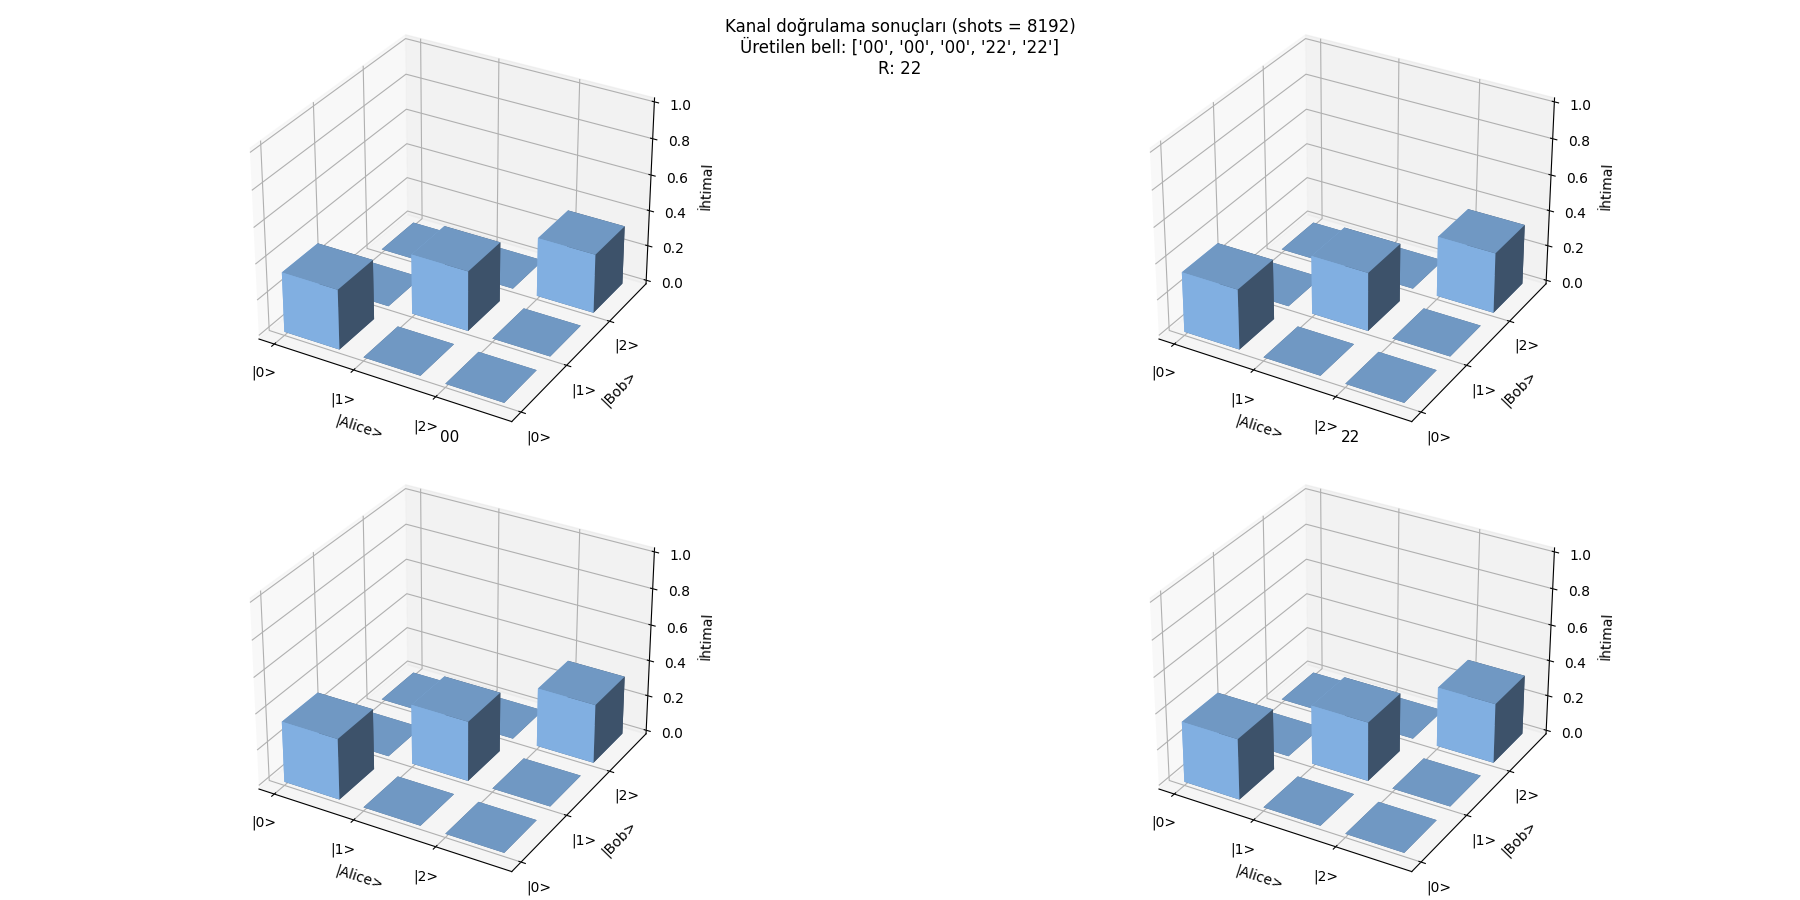

In [11]:
channel_verification()

In [12]:
authentation_protocol_test()   

Authentation Protocol Test
Alice and Bob chooses secret protocol: Measurement += 1
Alice prepaired |0> for teleportation, shots = 4096
Bob measured 4096 qutrit, 100% |0>
Bob's measurement and excepted protocol value match.
Bob prepaired |1> for teleportation, shots = 4096
Alice measured 4096 qutrit, 100% |1>
Alice's measurement and excepted protocol value match.
Alice prepaired |2> for teleportation, shots = 4096
Bob measured 4096 qutrit, 100% |2>
Bob's measurement and excepted protocol value match.
Alice confirms Bob.
Bob confirms Alice.




[0.3360595703125, 0, 0, 0, 0.3275146484375, 0, 0, 0, 0.33642578125]


<IPython.core.display.Javascript object>


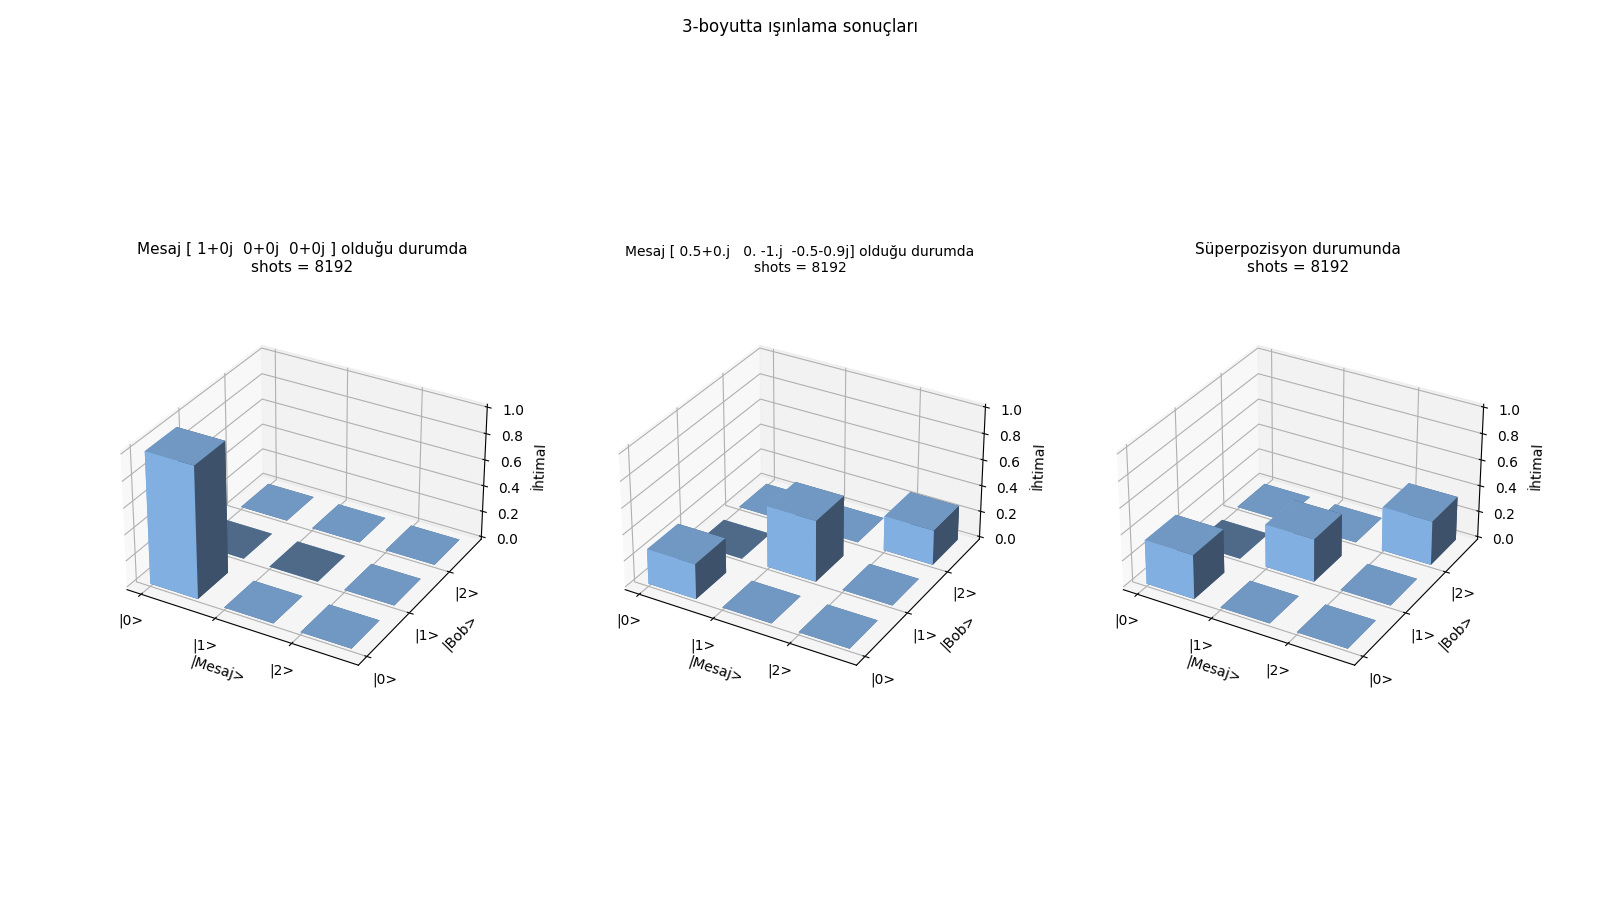

In [13]:
 teleportation_test()